# Researcher argreement analysis

In [6]:
# some_file.py
import sys
# insert at 1, 0 is the script path (or '' in REPL)
sys.path.insert(1, '../')

# import file

In [7]:
%matplotlib inline 
import matplotlib.pyplot as plt
import pandas as pd
pd.set_option('display.max_colwidth', None)
import numpy as np
from wordcloud import WordCloud
import utils
import umap
import hdbscan
import importlib
importlib.reload(utils)

<module 'utils' from '../utils.py'>

In [10]:
import matplotlib as mpl
plt.style.use('../presentation.mplstyle')
mpl.matplotlib_fname()

'/Users/kylehamilton/anaconda3/lib/python3.7/site-packages/matplotlib/mpl-data/matplotlibrc'

In [11]:
a=pd.read_csv("../Data/scopus-filtered-by-top-publication - Aparna.csv")

In [12]:
a.columns

Index(['Key', 'Item Type', 'Publication Year', 'Author', 'Title',
       'Abstract Note', 'include', 'relavance', 'Unnamed: 8',
       'Publication Title', 'DOI', 'Url', 'Date', 'Date Added',
       'Date Modified', 'Include (0,1)', 'Notes/Criteria'],
      dtype='object')

In [13]:
a=a[['Key','Title','Abstract Note','include']]

In [14]:
k=pd.read_csv("../Data/scopus-filtered-by-top-publication - Kyle.csv")

In [15]:
k.columns

Index(['Key', 'Item Type', 'Publication Year', 'Author', 'Title',
       'Include (01)', 'Notes/Criteria', 'Input data', 'Abstract Note',
       'Publication Title', 'DOI', 'Url', 'Date', 'Date Added',
       'Date Modified', 'Scopus relevance order'],
      dtype='object')

In [16]:
k=k[['Key','Title','Include (01)','Abstract Note']]
k=k.rename(columns = {'Include (01)':'include'})

In [17]:
b = pd.merge(a, k, on=["Key"], indicator="merge_indicator")

In [18]:
b=b.rename(columns = {'Title_x':'Title', 'Abstract Note_x':'Abstract','include_x':'include_aparna', 'include_y':'include_kyle'})
b=b[['Key','Title','Abstract','include_aparna','include_kyle']]

In [19]:
b.columns

Index(['Key', 'Title', 'Abstract', 'include_aparna', 'include_kyle'], dtype='object')

In [20]:
b.to_csv('include_comparison.csv',index=False)

In [21]:
both=len(b[(b['include_aparna']==1) & (b['include_kyle']==1)])
aparna=len(b[(b['include_aparna']==1) & (b['include_kyle']==0)])
kyle=len(b[(b['include_aparna']==0) & (b['include_kyle']==1)])

In [22]:
union_ak=b[(b['include_aparna']==1) | (b['include_kyle']==1)].sort_values(by=['include_aparna','include_kyle'],ascending=False)

In [23]:
union_ak.to_csv('include_union.csv',index=False)

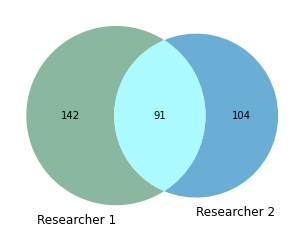

In [42]:
from matplotlib_venn import venn2
venn2(subsets = (kyle, aparna, both), set_labels = ('Researcher 1', 'Researcher 2'), alpha=1, set_colors=('#89b79f', '#6aaed6'))
# plt.title("Researcher Inclusion Agreement")
plt.savefig('../images/researcher_agreement.svg', format="svg",  bbox_inches='tight')

#### According to Kitchenham, agreement between researchers can be measured using the Cohen Kappa statistic.
- https://www.inf.ufsc.br/~aldo.vw/kitchenham.pdf
- Kappa values range from [-1,1], where 0 represents the exapected kappa score had the labels been assigned randomly.
$$
\kappa = (p_o - p_e) / (1 - p_e)
$$

- However, the meaning and usefulness of this score is disputed. 

In [20]:
from sklearn.metrics import cohen_kappa_score
'''
y1 - array of shape (n_samples,)
Labels assigned by the first annotator.

y2 - array of shape (n_samples,)
Labels assigned by the second annotator. The kappa statistic is symmetric, so swapping y1 and y2 doesn’t change the value.
'''
y1=b['include_kyle']
y2=b['include_aparna']

cohen_kappa_score(y1, y2)


0.33119677355467125

## TF-IDF
Even though the Kappa score is slightly higher than 0, it is clear that there is a lot of disagreement as between researchers as to which articles qualify for inclusion. Let's see if there is a clear difference in our choices.

* vectorizer = TfidfVectorizer(stop_words='english',min_df=0.2,max_df=maxdf,ngram_range=(1,3),strip_accents='unicode')
* Count only words occurring in at least 20% of the documents (min_df).

In [52]:

importlib.reload(utils)

<module 'utils' from '../utils.py'>

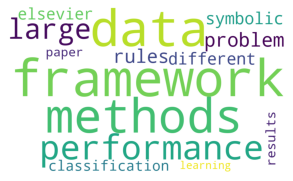

In [53]:
# Aparna's TfIdf tri-grams
ap=b[(b['include_aparna']==1) & (b['include_kyle']==0)]
a_abstracts=list(ap['Abstract'])
text=utils.getTFIDF(a_abstracts,top_n=100,maxdf=1.0)
utils.drawCloud(text,max_words=100,figsize=(5,10),raw=False, title="Researcher 2's TF-IDF\n----------\n",save=True,path='../images/R2_cloud.svg')

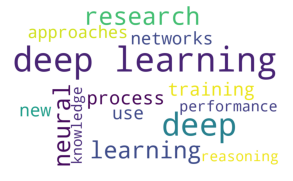

In [54]:
# Kyle's TfIdf
kp=b[(b['include_aparna']==0) & (b['include_kyle']==1)]
k_abstracts=list(kp['Abstract'])
text=utils.getTFIDF(k_abstracts,top_n=100,maxdf=1.0)
utils.drawCloud(text,max_words=100,figsize=(5,10),raw=False, title="Researcher 1's TF-IDF\n----------\n",save=True,path='../images/R1_cloud.svg')

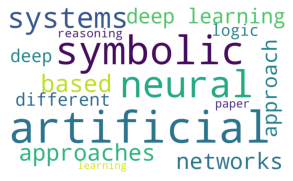

In [55]:
# Intersection TfIdf
ab=b[(b['include_aparna']==1) & (b['include_kyle']==1)]
a_abstracts=list(ab['Abstract'])
text=utils.getTFIDF(a_abstracts,top_n=100,maxdf=1.0)
utils.drawCloud(text,max_words=100,figsize=(5,5),raw=False, title="Intersection TF-IDF\n----------\n",save=True,path='../images/R12_cloud.svg')

In [4]:
a75=pd.read_csv("scopus (75).csv")

In [6]:
len(a75)

339

In [7]:
a75.columns

Index(['Key', 'Title', 'Abstract', 'include_aparna', 'include_kyle',
       'inclusion', 'disagreement', 'symbolic', 'NN', 'comments', 'input data',
       'IMPORTANT but doesn't meet criteria', 'kyle wants to read anyway ;)',
       'save for later'],
      dtype='object')

In [9]:
a75=a75[['Key', 'Title', 'include_aparna', 'include_kyle',
       'inclusion', 'disagreement', 'symbolic', 'NN', 'comments', 'input data']]

In [12]:
orig=pd.read_csv("scopus-filtered-by-top-publication - Aparna.csv")
print(orig.columns)
orig=orig[['Key','DOI','Publication Title', 'Publication Year', 'Title']]

Index(['Key', 'Item Type', 'Publication Year', 'Author', 'Title',
       'Abstract Note', 'include', 'relavance', 'Unnamed: 8',
       'Publication Title', 'DOI', 'Url', 'Date', 'Date Added',
       'Date Modified', 'Include (0,1)', 'Notes/Criteria'],
      dtype='object')


In [13]:
orig

,Key,DOI,Publication Title,Publication Year,Title
0,WLW49ADY,10.3233/SW-190368,Semantic Web,2020,Neural-symbolic integration and the Semantic Web
1,YXUZIQIU,10.1007/s10489-020-02165-6,Applied Intelligence,2021,Towards bridging the neuro-symbolic gap: deep deductive reasoners
2,EX5ZGV3N,10.1016/j.artint.2021.103504,Artificial Intelligence,2021,Neural probabilistic logic programming in DeepProbLog
3,YCQKU49S,10.1016/j.cogsys.2017.07.004,Cognitive Systems Research,2018,Learning Łukasiewicz logic
4,NPTPCDHQ,10.1109/TNNLS.2016.2603784,IEEE Transactions on Neural Networks and Learning Systems,2018,Deep Logic Networks: Inserting and Extracting Knowledge from Deep Belief Networks
...,...,...,...,...,...
1505,44UQWM7C,10.1109/TITS.2020.3046885,IEEE Transactions on Intelligent Transportation Systems,2021,Optimizing Locations and Qualities of Multiple Facilities With Competition via Intelligent Search
1506,28FVD3B5,10.1007/s00521-019-04509-x,Neural Computing and Applications,2020,Knowledge-based reinforcement learning controller with fuzzy-rule network: experimental validation
1507,C3XUFTES,10.1109/TCAD.2020.3025508,IEEE Transactions on Computer-Aided Design of Integrated Circuits and Systems,2020,A Data-Driven Asynchronous Neural Network Accelerator
1508,5HARP4V6,10.1016/j.artmed.2019.101722,Artificial Intelligence in Medicine,2019,Multi-criterion mammographic risk analysis supported with multi-label fuzzy-rough feature selection


In [21]:
a75

,Key,Title,include_aparna,include_kyle,inclusion,disagreement,symbolic,NN,comments,input data
0,WLW49ADY,Neural-symbolic integration and the Semantic Web,1.0,0,0.0,0.0,NaN,NaN,position paper,NaN
1,YXUZIQIU,Towards bridging the neuro-symbolic gap: deep deductive reasoners,1.0,0,0.0,0.0,NaN,NaN,position paper,NaN
2,EX5ZGV3N,Neural probabilistic logic programming in DeepProbLog,1.0,0,0.0,0.0,NaN,NaN,"This paper is important because it is refenced a lot in the literature, but it does not meet our specific criteria for text as input.",MNIST
3,YCQKU49S,Learning Łukasiewicz logic,1.0,0,0.0,0.0,NaN,NaN,not text input,NaN
4,NPTPCDHQ,Deep Logic Networks: Inserting and Extracting Knowledge from Deep Belief Networks,1.0,0,0.0,0.0,rule based,"deep belief network (DBN),\nrestricted boltzman machine (RBM)",NaN,"DNA,\nMNIST"
...,...,...,...,...,...,...,...,...,...,...
334,LVJ8NGHX,A computational analysis of general intelligence tests for evaluating cognitive development,0.0,0,0.0,0.0,rule,0,No ML/DL,NaN
335,MPD5LQBT,Cost-optimal constrained correlation clustering via weighted partial Maximum Satisfiability,0.0,0,0.0,0.0,0,clustering,Optimization technique,NaN
336,7YX447XS,Concept generalization and fusion for abstractive sentence generation,0.0,1,1.0,0.0,semantic resources,ML,Uses external data sources to semantically enrich text summarization. It is the application text fusion.,text
337,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [28]:
print(type(a75['inclusion'][0]))
print(type(a75['include_kyle'][0]))

<class 'numpy.float64'>
<class 'str'>


In [29]:
agree=a75[(a75['include_kyle']=="1") & (a75['inclusion']==1.0)]

In [30]:
agree.columns

Index(['Key', 'Title', 'include_aparna', 'include_kyle', 'inclusion',
       'disagreement', 'symbolic', 'NN', 'comments', 'input data'],
      dtype='object')

In [31]:
agree=agree[['Key', 'Title', 'symbolic', 'NN', 'comments', 'input data']]

In [33]:
joined=pd.merge(agree,orig,on='Key')

In [35]:
joined.columns

Index(['Key', 'Title_x', 'symbolic', 'NN', 'comments', 'input data', 'DOI',
       'Publication Title', 'Publication Year', 'Title_y'],
      dtype='object')

In [36]:
joined=joined[['Key','DOI','Publication Title', 'Publication Year','Title_x', 'symbolic', 'NN', 'comments']]

In [37]:
joined.to_csv('agreed75.csv',index=False)